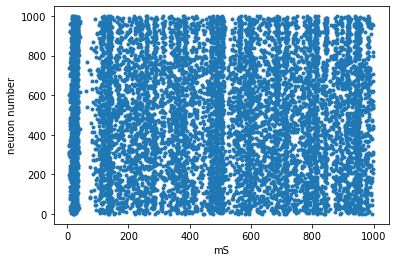

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class MultipleNeuron:
    def __init__(self, Ne, Ni):
        self.Ne = Ne
        self.Ni = Ni
        self.re = np.random.rand(self.Ne)
        self.ri = np.random.rand(self.Ni)

        self.a = np.hstack([np.full(self.Ne, 0.02), 0.02 + 0.08 * self.ri])
        self.b = np.hstack([np.full(self.Ne, 0.2), 0.25 - 0.05 * self.ri])
        self.c = np.hstack([-65 + 15 * np.power(self.re, 2), np.full(self.Ni, -65.0)])
        self.d = np.hstack([8 - 6 * np.power(self.re, 2), np.full(self.Ni, 2)])
        self.s = np.hstack([0.5 * np.random.rand(self.Ne + self.Ni, self.Ne), 
                            - np.random.rand(self.Ne + self.Ni, self.Ni)])

        self.v = np.full(self.Ne + self.Ni, -65.0)
        self.u = np.multiply(self.v, self.b)
        
        self.firings = []
        
    def run(self, t_step=1, t_end=1000):
        for i, t in enumerate(range(0, t_end, t_step)):
            I = np.hstack([5 * np.random.randn(self.Ne), 2 * np.random.randn(self.Ni)])

            fired = np.where(self.v >= 30)[0]
            self.v[fired] = self.c[fired]
            self.u[fired] = self.u[fired] + self.d[fired]
            
            I = I + np.sum(self.s[:, fired], axis=1)
            
            self.u = self.u + t_step * (self.a * (self.b * self.v - self.u))
            self.v = self.v + t_step * (0.04 * (self.v * self.v) + 5 * self.v + 140 - self.u + I)

            self.firings.extend(list(zip([t] * len(fired), fired.tolist())))

        self.firings = np.array(self.firings)

            
    def plot(self):
        plt.plot(self.firings[:, 0], self.firings[:, 1], '.')
        plt.xlabel('mS')
        plt.ylabel('neuron number')
        plt.show()
        
        
neuron = MultipleNeuron(Ne=800, Ni=200)
neuron.run()
neuron.plot()

In [62]:
class SingleNeuron:
    def __init__(self, a, b, c, d, v=-65):
        self.a, self.b, self.c, self.d = a, b, c, d
        self.v = v
        self.u = self.b * self.v 
        self.vector_V, self.vector_U, self.vector_I = [], [], []
        
    def run(self, t_step=1, t_end=500, I=[0]*50 + [10]*450):
        for i, _ in enumerate(range(0, t_end, t_step)):
            self.u = self.u + t_step * (self.a * (self.b * self.v - self.u))
            self.v = self.v + t_step * (0.04 * (self.v * self.v) + 5* self.v + 140 - self.u + I[i])

            if self.v >= 30:
                self.v = 30
            
            self.vector_V.append(self.v)
            self.vector_U.append(self.u)
            self.vector_I.append(I[i])
            
            if (self.v >= 30):
                self.v = self.c
                self.u = self.u + self.d
            
    def plot(self):
        plt.plot(self.vector_V, linestyle='solid')
        plt.plot(self.vector_U, linestyle='solid')
        plt.plot(self.vector_I, linestyle='dashdot')
        plt.legend(['v', 'u', 'I'], loc='upper right')
        plt.xlabel('mS')
        plt.ylabel('mV')
        plt.show()

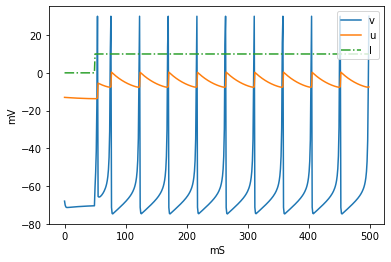

In [63]:
# RS

rs = SingleNeuron(a=0.02, b=0.2, c=-65, d=8)
rs.run()
rs.plot()

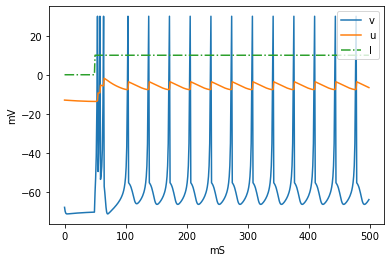

In [64]:
# IB

ib = SingleNeuron(a=0.02, b=0.2, c=-55, d=4)
ib.run()
ib.plot()

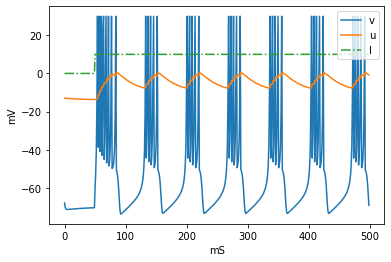

In [65]:
# CH

ch = SingleNeuron(a=0.02, b=0.2, c=-50, d=2)
ch.run()
ch.plot()

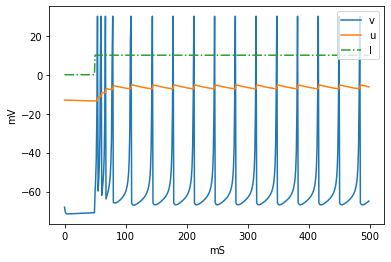

In [66]:
# FS

fs = SingleNeuron(a=0.01, b=0.2, c=-65, d=2)
fs.run()
fs.plot()

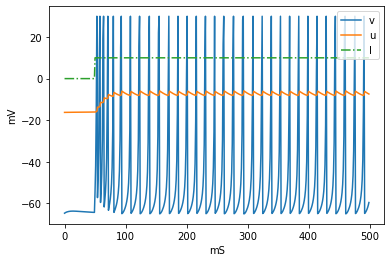

In [67]:
# LTS

lts = SingleNeuron(a=0.02, b=0.25, c=-65, d=2)
lts.run()
lts.plot()

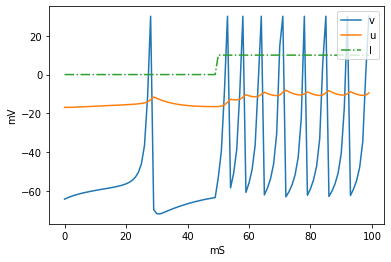

In [68]:
# RZ

rz = SingleNeuron(a=0.1, b=0.26, c=-65, d=2)
rz.run(t_end=100)
rz.plot()

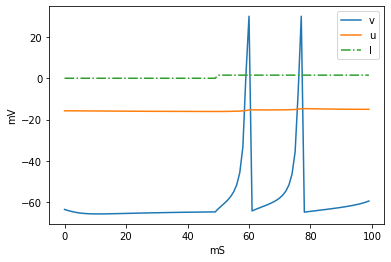

In [75]:
# TC, Thalamo-cortical

tc_65 = SingleNeuron(a=0.02, b=0.25, c=-65, d=0.05, v=-63)
tc_65.run(t_end=100, I=[0]*50 + [1.5]*50)
tc_65.plot()

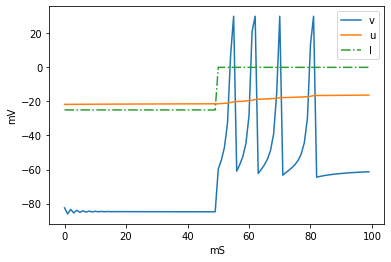

In [77]:
# TC: v=-90

tc_90 = SingleNeuron(a=0.02, b=0.25, c=-65, d=0.05, v=-87)
tc_90.run(t_end=100, I=[-25]*50 + [0]*50)
tc_90.plot()